In [1]:
import numpy as np
import pandas as pd
from sklearn import model_selection , preprocessing
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt 

# Loading training and testing data

In [2]:
training= pd.read_csv('titanic_train.csv',delimiter=',')

In [3]:
testing= pd.read_csv('titanic_test.csv',delimiter=',')

# Cleaning and processing training data

In [4]:
training

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
training['Ticket'].value_counts(ascending=True)

A/5 21171    1
3101296      1
29104        1
2641         1
2690         1
            ..
3101295      6
347088       6
CA. 2343     7
347082       7
1601         7
Name: Ticket, Length: 681, dtype: int64

In [6]:
print(training.isnull().sum(),'\n')
print(training.notnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64 

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64


In [7]:
def Male(gender):
    if gender=='male':
        return 1 
    else:
        return 0
    
def Female(gender):
    if gender=='female':
        return 1 
    else:
        return 0

In [8]:
training['Male']=training['Sex'].apply(Male)
training['Female']=training['Sex'].apply(Female)

In [9]:
training.drop('Sex',axis=1,inplace=True)

In [10]:
training

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Male,Female
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,0,1
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",27.0,0,0,211536,13.0000,NaN,S,1,0
887,888,1,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,B42,S,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",NaN,1,2,W./C. 6607,23.4500,NaN,S,0,1
889,890,1,1,"Behr, Mr. Karl Howell",26.0,0,0,111369,30.0000,C148,C,1,0


In [11]:
def Southampton(e):
    if e=='S':
        return 1
    else:
        return 0
    
def Queenstown(e):
    if e=='Q':
        return 1
    else:
        return 0

def Cherbourg(e):
    if e=='C':
        return 1
    else:
        return 0

In [12]:
training['Southampton']=training['Embarked'].apply(Southampton)
training['Queenstown']=training['Embarked'].apply(Queenstown)
training['Cherbourg']=training['Embarked'].apply(Cherbourg)

In [13]:
training.drop('Embarked',axis=1,inplace=True)

In [14]:
training

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Male,Female,Southampton,Queenstown,Cherbourg
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,1,0,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,0,1,0,0,1
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1,1,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,0,1,1,0,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",27.0,0,0,211536,13.0000,NaN,1,0,1,0,0
887,888,1,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,B42,0,1,1,0,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",NaN,1,2,W./C. 6607,23.4500,NaN,0,1,1,0,0
889,890,1,1,"Behr, Mr. Karl Howell",26.0,0,0,111369,30.0000,C148,1,0,0,0,1


In [15]:
def Cabin(x):
    if x is np.nan:
        return 0
    else:
        return 1

In [16]:
training["Cabin"] = training['Cabin'].apply(Cabin)
training.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Male,Female,Southampton,Queenstown,Cherbourg
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,0,1,0,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,1,0,1,0,0,1
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,0,0,1,1,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,1,0,1,1,0,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,0,1,0,1,0,0


In [17]:
training.drop('Name',axis=1,inplace=True)

In [18]:
#training.drop('Ticket',axis=1,inplace=True)

In [19]:
training.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
Male             0
Female           0
Southampton      0
Queenstown       0
Cherbourg        0
dtype: int64

In [20]:
training['Age'].fillna(training['Age'].mean(),inplace=True)

In [21]:
training

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Ticket,Fare,Cabin,Male,Female,Southampton,Queenstown,Cherbourg
0,1,0,3,22.000000,1,0,A/5 21171,7.2500,0,1,0,1,0,0
1,2,1,1,38.000000,1,0,PC 17599,71.2833,1,0,1,0,0,1
2,3,1,3,26.000000,0,0,STON/O2. 3101282,7.9250,0,0,1,1,0,0
3,4,1,1,35.000000,1,0,113803,53.1000,1,0,1,1,0,0
4,5,0,3,35.000000,0,0,373450,8.0500,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.000000,0,0,211536,13.0000,0,1,0,1,0,0
887,888,1,1,19.000000,0,0,112053,30.0000,1,0,1,1,0,0
888,889,0,3,29.699118,1,2,W./C. 6607,23.4500,0,0,1,1,0,0
889,890,1,1,26.000000,0,0,111369,30.0000,1,1,0,0,0,1


In [22]:
training.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Male           0
Female         0
Southampton    0
Queenstown     0
Cherbourg      0
dtype: int64

In [23]:
training.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,Male,Female,Southampton,Queenstown,Cherbourg
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,0.228956,0.647587,0.352413,0.722783,0.086420,0.188552
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429,0.420397,0.477990,0.477990,0.447876,0.281141,0.391372
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [24]:
training['Age**2']=training['Age']*training['Age']
training['Fare**2']=training['Fare']*training['Fare']

In [25]:
training=training[['PassengerId','Pclass','Age','Age**2','SibSp','Parch','Fare','Fare**2','Cabin','Male','Female','Southampton','Queenstown','Cherbourg','Survived']]

In [26]:
training

,PassengerId,Pclass,Age,Age**2,SibSp,Parch,Fare,Fare**2,Cabin,Male,Female,Southampton,Queenstown,Cherbourg,Survived
0,1,3,22.000000,484.000000,1,0,7.2500,52.562500,0,1,0,1,0,0,0
1,2,1,38.000000,1444.000000,1,0,71.2833,5081.308859,1,0,1,0,0,1,1
2,3,3,26.000000,676.000000,0,0,7.9250,62.805625,0,0,1,1,0,0,1
3,4,1,35.000000,1225.000000,1,0,53.1000,2819.610000,1,0,1,1,0,0,1
4,5,3,35.000000,1225.000000,0,0,8.0500,64.802500,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,27.000000,729.000000,0,0,13.0000,169.000000,0,1,0,1,0,0,0
887,888,1,19.000000,361.000000,0,0,30.0000,900.000000,1,0,1,1,0,0,1
888,889,3,29.699118,882.037589,1,2,23.4500,549.902500,0,0,1,1,0,0,0
889,890,1,26.000000,676.000000,0,0,30.0000,900.000000,1,1,0,0,0,1,1


In [27]:
training=training.values

In [28]:
training

array([[  1.        ,   3.        ,  22.        , ...,   0.        ,
          0.        ,   0.        ],
       [  2.        ,   1.        ,  38.        , ...,   0.        ,
          1.        ,   1.        ],
       [  3.        ,   3.        ,  26.        , ...,   0.        ,
          0.        ,   1.        ],
       ...,
       [889.        ,   3.        ,  29.69911765, ...,   0.        ,
          0.        ,   0.        ],
       [890.        ,   1.        ,  26.        , ...,   0.        ,
          1.        ,   1.        ],
       [891.        ,   3.        ,  32.        , ...,   1.        ,
          0.        ,   0.        ]])

In [29]:
training.shape

(891, 15)

In [30]:
X_train=training[:,:14]
Y_train=training[:,14]

In [31]:
X_train.shape,Y_train.shape

((891, 14), (891,))

In [32]:
scaler=preprocessing.StandardScaler()

In [33]:
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_train_scaled.shape

(891, 14)

In [34]:
X_train_scaled = np.append(X_train_scaled,np.ones(X_train_scaled.shape[0]).reshape(-1,1),axis=1)
X_train_scaled.shape,X_train_scaled[0].shape

((891, 15), (15,))

# Writing functions for Logistic Regression

In [35]:
def Sigmoid(agg):
    
    return 1/(1+np.exp(-agg))

In [36]:
def Cost(X_train,Y_train,m):
    
    cost_ = 0
    N = X_train.shape[0]
    for i in range(N):
        agg = (X_train[i]*m).sum()
        h = Sigmoid(agg)
        cost = -Y_train[i]*np.log(h) - (1-Y_train[i])*np.log(1-h)
        cost_ += cost
    
    return cost_

In [37]:
def Step_Gradient(X_train,Y_train,lr,m):
    
    N = X_train.shape[0]
    slope_m = np.zeros(X_train.shape[1])
    for i in range(N):
        agg = (X_train[i]*m).sum()
        h = Sigmoid(agg)
        slope_m+=(-1/N)*(Y_train[i]-h)*X_train[i]
        
    m = m - lr*slope_m
    return m

In [38]:
def Fit(X_train,Y_train,epochs=100,lr=0.01):
    
    m = np.zeros(X_train.shape[1])
    cost_array = []
    unit = epochs//100
    for i in range(epochs):
        m = Step_Gradient(X_train,Y_train,lr,m)
        cost_ = Cost(X_train,Y_train,m)
        cost_array.append(cost_)
        if i%unit==0:
            print("Epoch:{}, Cost:{}".format(i,cost_))
    
    return m,cost_array


In [39]:
def Predict(X_test,m):
    
    y_pred = []
    N = X_test.shape[0]
    for i in range(N):
        agg = (X_test[i]*m).sum()
        h = Sigmoid(agg)
        if h>=0.5:
            y_pred.append(1)
        else:
            y_pred.append(0)
            
    return np.array(y_pred)

In [40]:
def Accuracy(Y_test,Y_pred):
    
    correct = 0
    N = Y_test.shape[0]
    correct = (Y_test==Y_pred).sum()
    
    return (correct/N)*100

# Training the Model 

In [41]:
m,cost_array = Fit(X_train_scaled,Y_train,5000,0.01)
print(m)

Epoch:0, Cost:615.4561201040653
Epoch:50, Cost:536.6096228568468
Epoch:100, Cost:492.35879100293954
Epoch:150, Cost:465.4400888441127
Epoch:200, Cost:447.9373225503501
Epoch:250, Cost:435.93753553513017
Epoch:300, Cost:427.3508546090686
Epoch:350, Cost:420.98676795852174
Epoch:400, Cost:416.1302880571449
Epoch:450, Cost:412.3326685465654
Epoch:500, Cost:409.30147057126135
Epoch:550, Cost:406.8397660546191
Epoch:600, Cost:404.8110334216419
Epoch:650, Cost:403.11813127968117
Epoch:700, Cost:401.69029816326986
Epoch:750, Cost:400.47488621738233
Epoch:800, Cost:399.43197073530166
Epoch:850, Cost:398.5307529691237
Epoch:900, Cost:397.747107730929
Epoch:950, Cost:397.0618776926433
Epoch:1000, Cost:396.4596645593864
Epoch:1050, Cost:395.92795714968906
Epoch:1100, Cost:395.4564920221268
Epoch:1150, Cost:395.0367773571715
Epoch:1200, Cost:394.6617333115287
Epoch:1250, Cost:394.3254167487176
Epoch:1300, Cost:394.02280798349693
Epoch:1350, Cost:393.74964372674935
Epoch:1400, Cost:393.502284888297

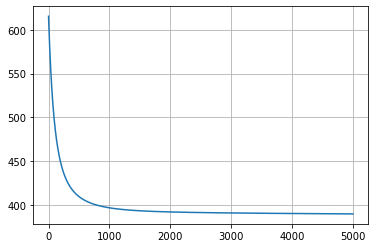

In [42]:
plt.plot(cost_array)
plt.grid()
plt.show()

In [43]:
Y_pred_train = Predict(X_train_scaled,m)
Accuracy(Y_train,Y_pred_train)

79.7979797979798

In [44]:
testing.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# Cleaning and Processing the testing data

In [45]:
testing['Ticket'].value_counts(ascending=True)

330911         1
A. 2. 39186    1
C.A. 49867     1
112051         1
349235         1
              ..
220845         3
C.A. 31029     3
CA. 2343       4
113503         4
PC 17608       5
Name: Ticket, Length: 363, dtype: int64

In [46]:
testing['Male']=testing['Sex'].apply(Male)
testing['Female']=testing['Sex'].apply(Female)

In [47]:
testing.drop('Sex',axis=1,inplace=True)

In [48]:
testing['Southampton']=testing['Embarked'].apply(Southampton)
testing['Queenstown']=testing['Embarked'].apply(Queenstown)
testing['Cherbourg']=testing['Embarked'].apply(Cherbourg)

In [49]:
testing.drop('Embarked',axis=1,inplace=True)

In [50]:
testing["Cabin"] = testing['Cabin'].apply(Cabin)

In [51]:
testing.drop('Name',axis=1,inplace=True)

In [52]:
#testing.drop('Ticket',axis=1,inplace=True)

In [53]:
testing['Age'].fillna(testing['Age'].mean(),inplace=True)

In [54]:
testing['Age**2']=testing['Age']*testing['Age']
testing['Fare**2']=testing['Fare']*testing['Fare']

In [55]:
testing=testing[['PassengerId','Pclass','Age','Age**2','SibSp','Parch','Fare','Fare**2','Cabin','Male','Female','Southampton','Queenstown','Cherbourg']]

In [56]:
testing

,PassengerId,Pclass,Age,Age**2,SibSp,Parch,Fare,Fare**2,Cabin,Male,Female,Southampton,Queenstown,Cherbourg
0,892,3,34.50000,1190.250000,0,0,7.8292,61.296373,0,1,0,0,1,0
1,893,3,47.00000,2209.000000,1,0,7.0000,49.000000,0,0,1,1,0,0
2,894,2,62.00000,3844.000000,0,0,9.6875,93.847656,0,1,0,0,1,0
3,895,3,27.00000,729.000000,0,0,8.6625,75.038906,0,1,0,1,0,0
4,896,3,22.00000,484.000000,1,1,12.2875,150.982656,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,30.27259,916.429727,0,0,8.0500,64.802500,0,1,0,1,0,0
414,1306,1,39.00000,1521.000000,0,0,108.9000,11859.210000,1,0,1,0,0,1
415,1307,3,38.50000,1482.250000,0,0,7.2500,52.562500,0,1,0,1,0,0
416,1308,3,30.27259,916.429727,0,0,8.0500,64.802500,0,1,0,1,0,0


In [57]:
testing.shape

(418, 14)

In [58]:
X_test=testing.values

In [59]:
X_test.shape

(418, 14)

In [60]:
X_test_scaled = scaler.transform(X_test)
X_test_scaled = np.append(X_test_scaled,np.ones(X_test_scaled.shape[0]).reshape(-1,1),axis=1)

In [61]:
X_test_scaled.shape

(418, 15)

# Taking predictions

In [62]:
Y_pred_test = Predict(X_test_scaled,m)

In [63]:
#results=np.savetxt('results.csv',Y_pred_test)

In [64]:
output = pd.DataFrame({'PassengerId': testing.PassengerId, 'Survived': Y_pred_test})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
